<a href="https://colab.research.google.com/github/fareehaikram/CNN-with-keras/blob/main/Train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import pandas as pd
import numpy as np
import glob

from keras.preprocessing import image
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import os,shutil
from keras import models,layers,optimizers
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization

import cv2

from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from tqdm import tqdm
from keras.applications.vgg16 import VGG16

from keras.applications.vgg16 import preprocess_input

In [ ]:
model_vgg = VGG16(include_top=False,input_shape=(150,150,3),weights='imagenet')



58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
for layer in model_vgg.layers:
  layer.trainable=False


In [ ]:
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
#adding my own customed layer
x=Flatten()(model_vgg.output)

In [ ]:
x=Dense(4096, activation='relu')(x)
x=Dense(4096, activation='relu')(x)


In [ ]:
prediction=Dense(6,activation='softmax')(x)

In [ ]:
#create a model object
model=Model(inputs=model_vgg.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
from keras.utils.vis_utils import plot_model

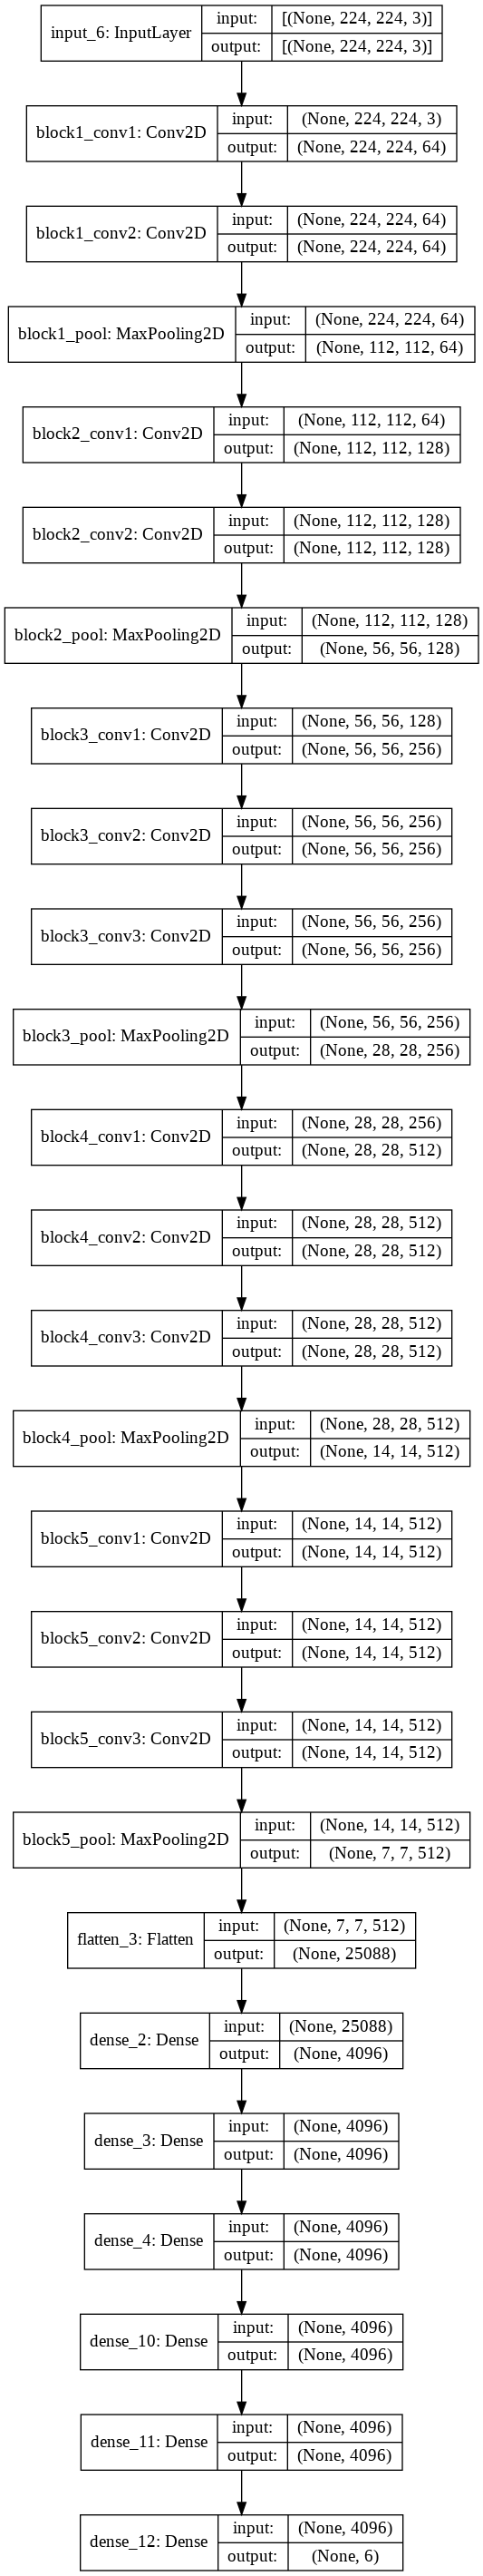

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy']
              )

In [ ]:
#The most useful thing about this class is that it doesn’t affect the data stored on the disk. This class alters the data on the go while passing it to the model.
train_datagen = ImageDataGenerator(rescale=1./255,
                                   
                           shear_range = 0.2,
                           zoom_range = 0.2,
                           horizontal_flip=True,
                           #vertical_flip=True
                           )# Generate batches of tensor image data with real-time data augmentation.
test_datagen = ImageDataGenerator(rescale=1./255,
                           
                           )#validation data is rescaled to match the train data


In [ ]:
train_set=train_datagen.flow_from_directory('/content/seg_train/seg_train',target_size=(150,150),batch_size=32,class_mode='categorical')


Found 14034 images belonging to 6 classes.


In [ ]:
test_set=train_datagen.flow_from_directory('/content/seg_test/seg_test',target_size=(150,150),batch_size=32,class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_trained_wts.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')

r=model.fit_generator(train_set,validation_data=test_set,epochs=100,steps_per_epoch=6,validation_steps=6,callbacks=[checkpoint,early])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
6/6 [==============================] - 76s 14s/step - loss: 0.5897 - accuracy: 0.7865 - val_loss: 0.6338 - val_accuracy: 0.7812

Epoch 00001: val_accuracy improved from -inf to 0.78125, saving model to vgg16_trained_wts.h5


KeyboardInterrupt: ignored

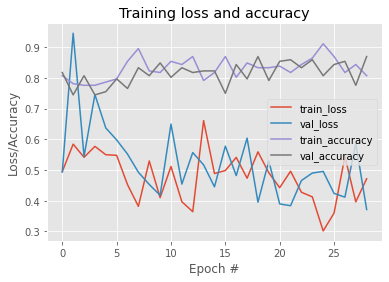

In [ ]:
'''LEARNING CURVE'''

import matplotlib.pyplot as plt
#N = np.arange(0, 10)
plt.style.use('ggplot')
plt.figure()
plt.plot( r.history['loss'], label='train_loss')
plt.plot( r.history['val_loss'], label='val_loss')
plt.plot( r.history['accuracy'], label='train_accuracy')
plt.plot( r.history['val_accuracy'], label='val_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()